<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imporando-Pacotes" data-toc-modified-id="Imporando-Pacotes-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imporando Pacotes</a></span></li><li><span><a href="#Função-de-Entrada" data-toc-modified-id="Função-de-Entrada-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Função de Entrada</a></span></li><li><span><a href="#Dicionários" data-toc-modified-id="Dicionários-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Dicionários</a></span></li><li><span><a href="#Cenários" data-toc-modified-id="Cenários-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Cenários</a></span></li><li><span><a href="#Otimização" data-toc-modified-id="Otimização-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Otimização</a></span></li></ul></div>

# Imporando Pacotes

In [1]:
# Importando as bibliotecas
import numpy as np # pacote para funções matemáticas
import pandas as pd # pacote para a manipulação dos dados em tabela
import warnings
import itertools
from IPython.display import display # Allows the use of display() for DataFrames
import matplotlib.pyplot as plt # pacote para fazer gráficos
import matplotlib.patches as mpatches
import seaborn as sns
import datetime as dt
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px
import plotly.graph_objects as go
import scikitplot as skplt
import sqlite3 as sql

import pandas_ta as ta
import talib

import mplfinance as mpf

import optuna
from optuna.visualization import plot_contour
from optuna.visualization import plot_edf
from optuna.visualization import plot_intermediate_values
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_parallel_coordinate
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_slice

pd.set_option("display.max_columns", 40)
pd.set_option('display.max_rows', 500)

C:\Users\User\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\User\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
from futures_backtester import Backtester

# Função de Entrada

In [3]:
import importlib
name_strategy = 'gold_rsi_trend'  # Nome da função/classe no módulo entries
module = importlib.import_module('entries')
entrada = getattr(module, name_strategy)

# Dicionários

In [4]:

path_b3 = 'C:/Users/User/OneDrive/Documentos/rnt/Finance/Trading Projects/00.database/candlestick data/futuros/'
path_tickmill = 'C:/Users/User/OneDrive/Documentos/rnt/Finance/Trading Projects/00.database/tickmill/forex/'

dict_custos = {'WIN@N':0.2*5, 'WDO@N':2.40/2,
                                     'AUDUSD': 3,
                                     'EURUSD': 3,
                                     'GBPUSD': 3,
                                     'NZDUSD': 3,
                                     'USDCHF': 3,
                                     'USDJPY': 3,
                                     'AUDCAD': 3,
                                     'AUDCHF': 3,
                                     'AUDJPY': 3,
                                     'AUDNZD': 3,
                                     'CADCHF': 3,
                                     'CADJPY': 3,
                                     'CHFJPY': 3,
                                     'EURAUD': 3,
                                     'EURCAD': 3,
                                     'EURCHF': 3,
                                     'EURGBP': 3,
                                     'EURHKD': 3,
                                     'EURJPY': 3,
                                     'EURMXN': 3,
                                     'EURNZD': 3,
                                     'EURTRY': 3,
                                     'GBPCAD': 3,
                                     'GBPCHF': 3,
                                     'GBPJPY': 3,
                                     'USDCNH': 3,
                                     'USDCZK': 3,
                                     'USDMXN': 3,
                                     'USDTRY': 3,
                                     'XAGUSD': 3,
                                     'XAUUSD': 3,
                                     'STOXX50': 3,
                                     'UK100': 3,
                                     'FRANCE40': 3,
                                     'VIX': 3,
                                     'ALUMINIUM': 3,
                                     'PLATINUM': 3,
                                     'LEAD': 3,
                                     'NICKEL': 3,
                                     'PALLADIUM': 3,
                                     'ZINC': 3,
                                     'COPPER': 3,
                                     'DXY': 3,
                                     'COCOA': 3,
                                     'SUGAR': 3,
                                     'WHEAT': 3,
                                     'US500': 3,
                                     'NAT.GAS': 3,
                                     'BRENT': 3,
                                     'EEM': 3,
                                     'EWZ': 3,
                                     'IWM': 3,
                                     'TLT': 3,
                                     'SPY': 3,
                                     'DIA': 3}

dict_valor_lot = {'WIN@N':0.2, 'WDO@N':10.0,
                                'USDCAD': 100000,
                                 'AUDUSD': 100000,
                                 'EURUSD': 100000,
                                 'GBPUSD': 100000,
                                 'NZDUSD': 100000,
                                 'USDCHF': 100000,
                                 'USDJPY': 100000,
                                 'AUDCAD': 100000,
                                 'AUDCHF': 100000,
                                 'AUDJPY': 100000,
                                 'AUDNZD': 100000,
                                 'CADCHF': 100000,
                                 'CADJPY': 100000,
                                 'CHFJPY': 100000,
                                 'EURAUD': 100000,
                                 'EURCAD': 100000,
                                 'EURCHF': 100000,
                                 'EURGBP': 100000,
                                 'EURHKD': 100000,
                                 'EURJPY': 100000,
                                 'EURMXN': 100000,
                                 'EURNZD': 100000,
                                 'EURTRY': 100000,
                                 'GBPCAD': 100000,
                                 'GBPCHF': 100000,
                                 'GBPJPY': 100000,
                                 'USDCNH': 100000,
                                 'USDCZK': 100000,
                                 'USDMXN': 100000,
                                 'USDTRY': 100000,
                                 'XAGUSD': 100000,
                                 'XAUUSD': 100000,
                                 'STOXX50': 100000,
                                 'UK100': 100000,
                                 'FRANCE40': 100000,
                                 'VIX': 100000,
                                 'ALUMINIUM': 100000,
                                 'PLATINUM': 100000,
                                 'LEAD': 100000,
                                 'NICKEL': 100000,
                                 'PALLADIUM': 100000,
                                 'ZINC': 100000,
                                 'COPPER': 100000,
                                 'DXY': 100000,
                                 'COCOA': 100000,
                                 'SUGAR': 100000,
                                 'WHEAT': 100000,
                                 'US500': 100000,
                                 'NAT.GAS': 100000,
                                 'BRENT': 100000,
                                 'EEM': 100000,
                                 'EWZ': 100000,
                                 'IWM': 100000,
                                 'TLT': 100000,
                                 'SPY': 100000,
                                 'DIA': 100000}

dict_path = {'WIN@N':path_b3, 'WDO@N':path_b3, 
                              'USDCAD': path_tickmill,
                             'AUDUSD': path_tickmill,
                             'EURUSD': path_tickmill,
                             'GBPUSD': path_tickmill,
                             'NZDUSD': path_tickmill,
                             'USDCHF': path_tickmill,
                             'USDJPY': path_tickmill,
                             'AUDCAD': path_tickmill,
                             'AUDCHF': path_tickmill,
                             'AUDJPY': path_tickmill,
                             'AUDNZD': path_tickmill,
                             'CADCHF': path_tickmill,
                             'CADJPY': path_tickmill,
                             'CHFJPY': path_tickmill,
                             'EURAUD': path_tickmill,
                             'EURCAD': path_tickmill,
                             'EURCHF': path_tickmill,
                             'EURGBP': path_tickmill,
                             'EURHKD': path_tickmill,
                             'EURJPY': path_tickmill,
                             'EURMXN': path_tickmill,
                             'EURNZD': path_tickmill,
                             'EURTRY': path_tickmill,
                             'GBPCAD': path_tickmill,
                             'GBPCHF': path_tickmill,
                             'GBPJPY': path_tickmill,
                             'USDCNH': path_tickmill,
                             'USDCZK': path_tickmill,
                             'USDMXN': path_tickmill,
                             'USDTRY': path_tickmill,
                             'XAGUSD': path_tickmill,
                             'XAUUSD': path_tickmill,
                             'STOXX50': path_tickmill,
                             'UK100': path_tickmill,
                             'FRANCE40': path_tickmill,
                             'VIX': path_tickmill,
                             'ALUMINIUM': path_tickmill,
                             'PLATINUM': path_tickmill,
                             'LEAD': path_tickmill,
                             'NICKEL': path_tickmill,
                             'PALLADIUM': path_tickmill,
                             'ZINC': path_tickmill,
                             'COPPER': path_tickmill,
                             'DXY': path_tickmill,
                             'COCOA': path_tickmill,
                             'SUGAR': path_tickmill,
                             'WHEAT': path_tickmill,
                             'US500': path_tickmill,
                             'NAT.GAS': path_tickmill,
                             'BRENT': path_tickmill,
                             'EEM': path_tickmill,
                             'EWZ': path_tickmill,
                             'IWM': path_tickmill,
                             'TLT': path_tickmill,
                             'SPY': path_tickmill,
                             'DIA': path_tickmill}

# Cenários

In [5]:
# 5 min - win
{'sl': 250, 'tp': 550, 'LENGTH_RSI': 9, 'RSI_LOW': 30, 'RSI_HIGH': 70}
{'sl': 1727, 'tp': 1728, 'LENGTH_RSI': 4, 'RSI_LOW': 36, 'RSI_HIGH': 69} # 10h
{'sl': 630, 'tp': 1500, 'LENGTH_RSI': 7, 'RSI_LOW': 32, 'RSI_HIGH': 50} # 11h

# 5 min - wdo
{'sl': 18, 'tp': 8, 'LENGTH_RSI': 8, 'RSI_LOW': 28, 'RSI_HIGH': 73}
{'sl': 11, 'tp': 27, 'LENGTH_RSI': 15, 'RSI_LOW': 26, 'RSI_HIGH': 65}
{'sl': 23, 'tp': 31, 'LENGTH_RSI': 11, 'RSI_LOW': 38, 'RSI_HIGH': 62}

{'sl': 18, 'tp': 8, 'LENGTH_RSI': 8, 'RSI_LOW': 28, 'RSI_HIGH': 73}

In [384]:
params = {'sl': 250, 'tp': 550, 'LENGTH_RSI': 9, 'RSI_LOW': 30, 'RSI_HIGH': 70}
params = {'sl': 1727, 'tp': 1728, 'LENGTH_RSI': 4, 'RSI_LOW': 36, 'RSI_HIGH': 69} # 10h
#params = {'sl': 630, 'tp': 1500, 'LENGTH_RSI': 7, 'RSI_LOW': 32, 'RSI_HIGH': 50} # 11h
params = {'sl': 350, 'tp': 750, 'LENGTH_RSI': 9, 'RSI_LOW': 30, 'RSI_HIGH': 70}

#params = {'sl': 0.00800, 'tp': 0.00400, 'LENGTH_RSI': 15, 'RSI_LOW': 35, 'RSI_HIGH': 65}
#params = {'sl': 0.10000, 'tp': 0.30000, 'LENGTH_RSI': 9, 'RSI_LOW': 35, 'RSI_HIGH': 65}
#params = {'sl': 0.10000, 'tp': 0.30000, 'LENGTH_RSI': 9, 'RSI_LOW': 40, 'RSI_HIGH': 60}
#params = {'sl': 300, 'tp': 500, 'LENGTH_RSI': 9, 'RSI_LOW': 30, 'RSI_HIGH': 70}

In [385]:
# Configurar o backtester
#sym = 'WDO@N'
sym = 'WIN@N'

bt = Backtester(
    symbol = sym,
    timeframe = 't5',
    data_ini = '2021-01-01',
    data_fim = '2025-06-14',
    tp = params['tp'],
    sl = params['sl'],
    slippage = 0,
    tc = dict_custos[sym], # $ per lot
    lote = 1,
    valor_lote= dict_valor_lot[sym],
    initial_cash = 30000,
    path_base= dict_path[sym],
    daytrade = True
)

# Parâmetros da estratégia RSI
LENGTH_RSI = params['LENGTH_RSI']
RSI_LOW = params['RSI_LOW']
RSI_HIGH = params['RSI_HIGH']

# Executa o backtest com a estratégia RSI
results, metrics = bt.run(
    signal_function=entrada, 
    signal_args={
        "length_rsi": LENGTH_RSI,
        "rsi_low": RSI_LOW,
        "rsi_high": RSI_HIGH,
        'allowed_hours': [10,11,12,13,14,15,16,17],
        #'allowed_hours': [11],
        'position_type': "both"
    }
)

# Print de métricas
bt.print_metrics(metrics)

RELATÓRIO DE DESEMPENHO
Símbolo: WIN@N
Timeframe: t5
Período: 2021-01-01 a 2025-06-14

--- RESULTADOS ---
Saldo Inicial: $30000.00
Saldo Final: $49754.00
Retorno Total: $19754.00 (65.85%)
Retorno Anualizado: 12.36%
Volatilidade Anualizada: 12.25%

--- DRAWDOWN ---
Drawdown Máximo: 10.66%
Drawdown Máximo (Valor): $3524.00
Tempo Máximo em Drawdown: 16804.0 períodos
Tempo em Drawdown: 96.26% do total

--- TRADES ---
Total de Trades: 5609
Trades Vencedores: 2357 (42.02%)
Trades Perdedores: 3239 (57.98%)
Saídas por TP: 19.93%
Saídas por SL: 46.69%
Saídas por Tempo: 33.37%

--- RATIOS ---
Sharpe Ratio: 1.009
Sortino Ratio: 2.403
Calmar Ratio: 1.160
Profit Factor: 1.096

--- ANÁLISE DE GANHOS/PERDAS ---
Ganho Médio: $95.25
Perda Média: $63.22
Win/Loss Ratio: 1.51
Expectancy: $3.38


<module 'matplotlib.pyplot' from 'C:\\Users\\User\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

<Figure size 1400x1000 with 0 Axes>

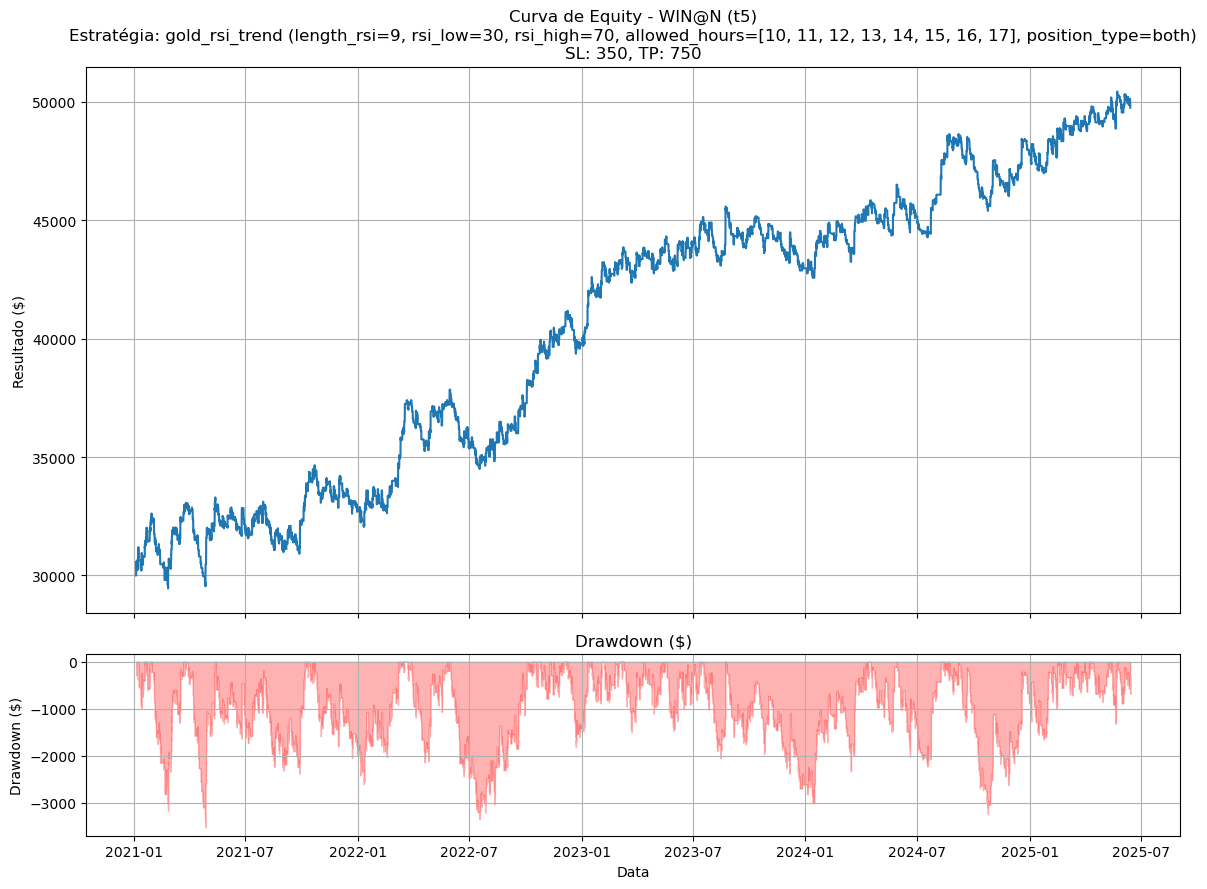

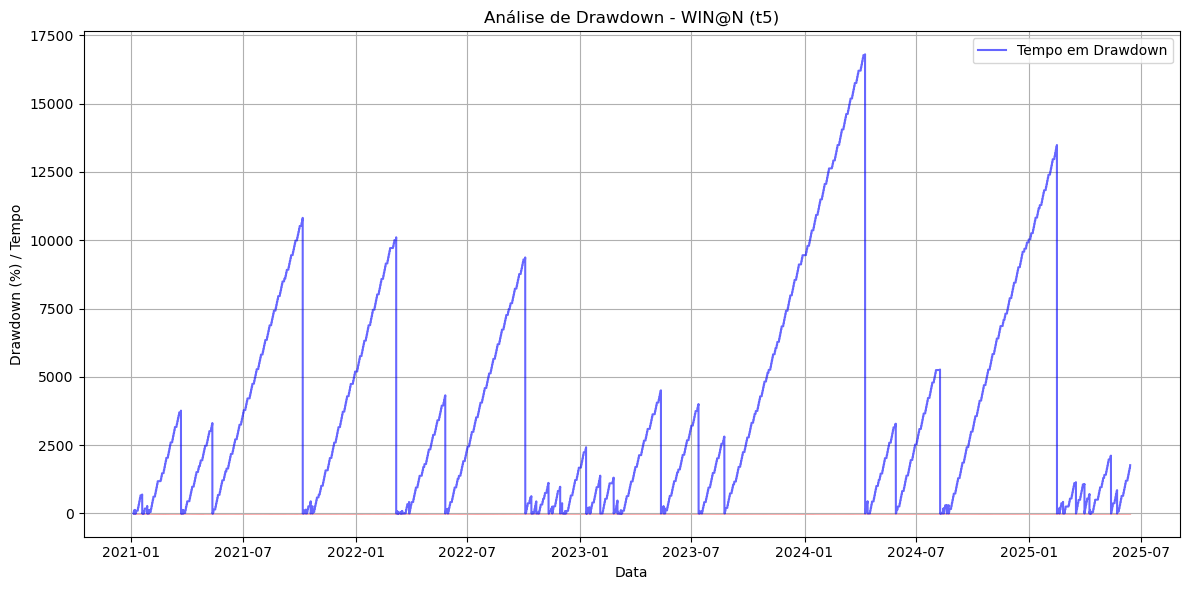

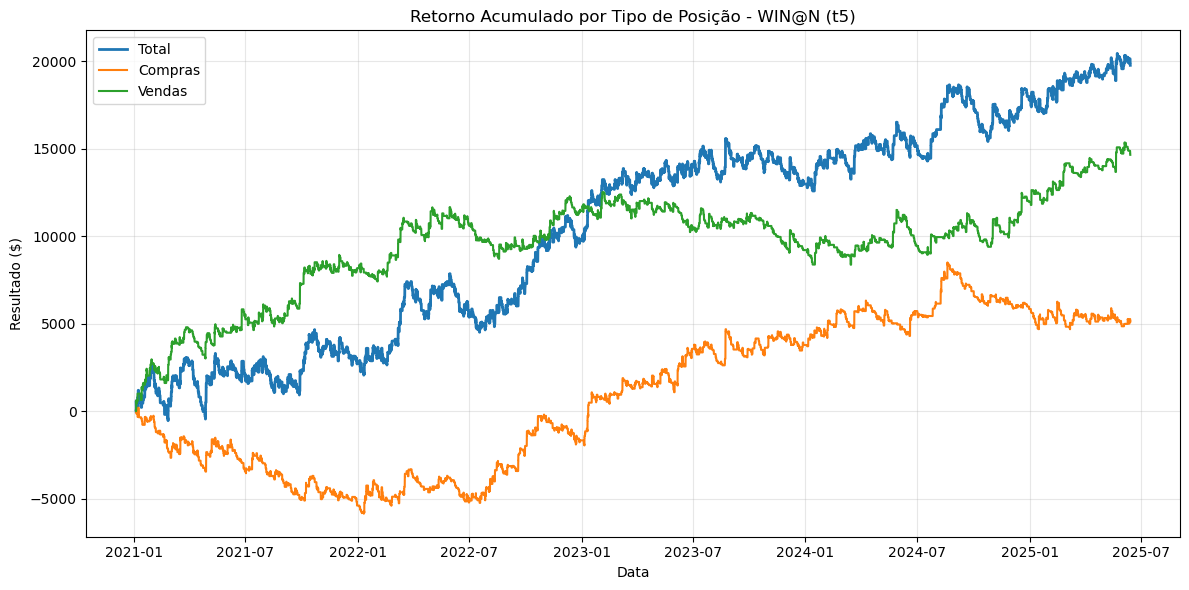

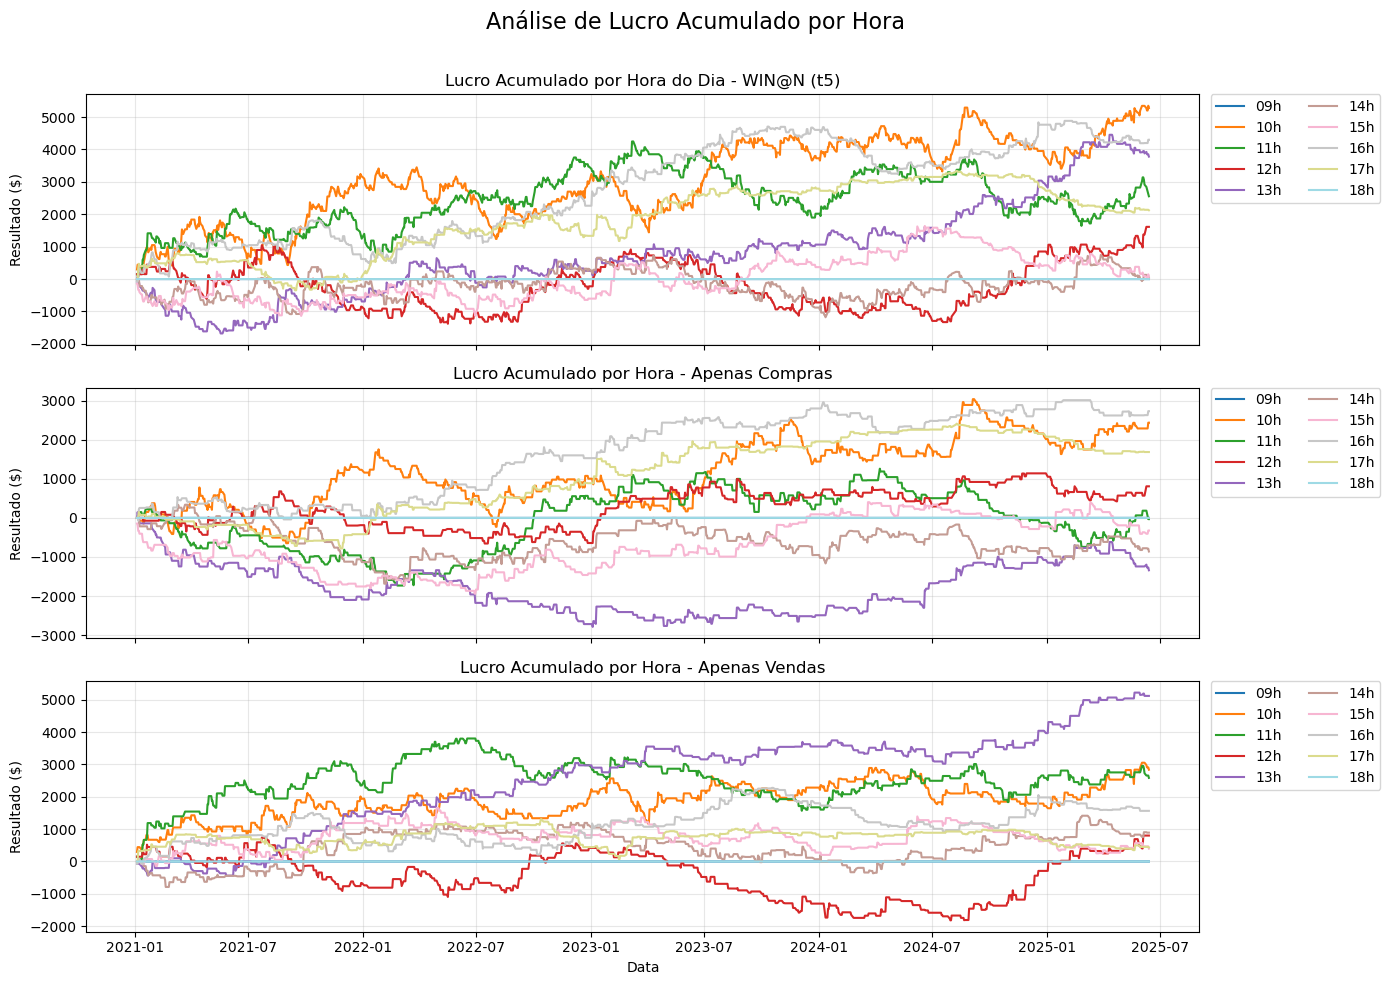

In [386]:
# Plotar a curva de equity com drawdown
plt.figure(figsize=(14, 10))

# 1. Curva de equity
plt = bt.plot_equity_curve(include_drawdown=True)

# 2. Análise detalhada de drawdown
plt = bt.plot_drawdown()

# 3. resultado por hora
bt.plot_by_position()
bt.plot_cumulative_by_hour()

# Otimização

In [387]:
def objective_ind(trial):  
    
    '''
    função para maximizar os ganhos no mini-indice
    '''

    # Configurar o backtester
    sym = 'WIN@N'
    bt = Backtester(
        symbol = sym,
        timeframe = 't5',
        data_ini = '2020-06-01',
        data_fim = '2025-12-31',
        sl = trial.suggest_int('sl', 100.0, 1900.0),
        tp = trial.suggest_int('tp', 100.0, 1900.0),
        slippage = 0,
        tc = dict_custos[sym], # $ per lot
        lote = 1,
        valor_lote= dict_valor_lot[sym],
        initial_cash = 30000,
        path_base= dict_path[sym],
        daytrade = True
    )
    
    # Parâmetros da estratégia RSI
    LENGTH_RSI = trial.suggest_int('LENGTH_RSI', 4, 14)
    RSI_LOW = trial.suggest_int('RSI_LOW', 20, 50)
    RSI_HIGH = trial.suggest_int('RSI_HIGH', 50, 80)
    
    # Executa o backtest com a estratégia RSI
    _, metrics = bt.run(
        signal_function=entrada, 
        signal_args={
            "length_rsi": LENGTH_RSI,
            "rsi_low": RSI_LOW,
            "rsi_high": RSI_HIGH,
            'allowed_hours': [10,11,12,13,14,15,16,17],
            'position_type': "both"
        }
    )

    
    metrica = metrics['total_return']
    #metrica = metrics['max_drawdown_value']
        
    return metrica

In [ ]:
study = optuna.create_study(direction="maximize")

study.optimize(objective_ind, n_trials=220)

[I 2025-06-21 14:04:28,430] A new study created in memory with name: no-name-68fdcada-97e2-4908-a0c9-677a74f61ee5
[I 2025-06-21 14:04:29,212] Trial 0 finished with value: 19527.19999999964 and parameters: {'sl': 1876, 'tp': 1894, 'LENGTH_RSI': 12, 'RSI_LOW': 44, 'RSI_HIGH': 57}. Best is trial 0 with value: 19527.19999999964.
[I 2025-06-21 14:04:29,993] Trial 1 finished with value: -23804.800000001414 and parameters: {'sl': 372, 'tp': 335, 'LENGTH_RSI': 4, 'RSI_LOW': 38, 'RSI_HIGH': 79}. Best is trial 0 with value: 19527.19999999964.
[I 2025-06-21 14:04:30,786] Trial 2 finished with value: -8016.400000000518 and parameters: {'sl': 1083, 'tp': 1604, 'LENGTH_RSI': 7, 'RSI_LOW': 49, 'RSI_HIGH': 60}. Best is trial 0 with value: 19527.19999999964.
[I 2025-06-21 14:04:31,586] Trial 3 finished with value: -53213.600000006765 and parameters: {'sl': 767, 'tp': 451, 'LENGTH_RSI': 4, 'RSI_LOW': 45, 'RSI_HIGH': 62}. Best is trial 0 with value: 19527.19999999964.
[I 2025-06-21 14:04:32,496] Trial 4 

[I 2025-06-21 14:04:58,246] Trial 36 finished with value: 51142.0 and parameters: {'sl': 1055, 'tp': 1620, 'LENGTH_RSI': 4, 'RSI_LOW': 22, 'RSI_HIGH': 70}. Best is trial 21 with value: 57770.00000000255.
[I 2025-06-21 14:04:59,055] Trial 37 finished with value: 49248.19999999723 and parameters: {'sl': 1067, 'tp': 1641, 'LENGTH_RSI': 4, 'RSI_LOW': 22, 'RSI_HIGH': 75}. Best is trial 21 with value: 57770.00000000255.
[I 2025-06-21 14:04:59,869] Trial 38 finished with value: 12651.9999999984 and parameters: {'sl': 752, 'tp': 1582, 'LENGTH_RSI': 5, 'RSI_LOW': 47, 'RSI_HIGH': 70}. Best is trial 21 with value: 57770.00000000255.
[I 2025-06-21 14:05:00,676] Trial 39 finished with value: 40590.40000000101 and parameters: {'sl': 1120, 'tp': 1507, 'LENGTH_RSI': 4, 'RSI_LOW': 24, 'RSI_HIGH': 77}. Best is trial 21 with value: 57770.00000000255.
[I 2025-06-21 14:05:01,502] Trial 40 finished with value: 35090.800000000316 and parameters: {'sl': 1033, 'tp': 1188, 'LENGTH_RSI': 5, 'RSI_LOW': 40, 'RSI_H

[I 2025-06-21 14:05:28,483] Trial 73 finished with value: 52981.0 and parameters: {'sl': 575, 'tp': 1690, 'LENGTH_RSI': 6, 'RSI_LOW': 25, 'RSI_HIGH': 72}. Best is trial 56 with value: 59575.20000000547.
[I 2025-06-21 14:05:29,292] Trial 74 finished with value: 44082.79999999727 and parameters: {'sl': 704, 'tp': 1543, 'LENGTH_RSI': 6, 'RSI_LOW': 26, 'RSI_HIGH': 67}. Best is trial 56 with value: 59575.20000000547.
[I 2025-06-21 14:05:30,116] Trial 75 finished with value: 26728.599999998645 and parameters: {'sl': 337, 'tp': 1473, 'LENGTH_RSI': 10, 'RSI_LOW': 20, 'RSI_HIGH': 65}. Best is trial 56 with value: 59575.20000000547.
[I 2025-06-21 14:05:30,922] Trial 76 finished with value: 31102.800000007206 and parameters: {'sl': 488, 'tp': 1254, 'LENGTH_RSI': 4, 'RSI_LOW': 23, 'RSI_HIGH': 66}. Best is trial 56 with value: 59575.20000000547.
[I 2025-06-21 14:05:31,728] Trial 77 finished with value: 13943.199999999903 and parameters: {'sl': 1343, 'tp': 1405, 'LENGTH_RSI': 5, 'RSI_LOW': 44, 'RSI_

In [374]:
study.best_params

{'sl': 1364, 'tp': 554, 'LENGTH_RSI': 10, 'RSI_LOW': 35, 'RSI_HIGH': 69}

In [ ]:
plot_param_importances(study)